# Unsupervised Learning
**-> les données sont non étiquetées**

In [27]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

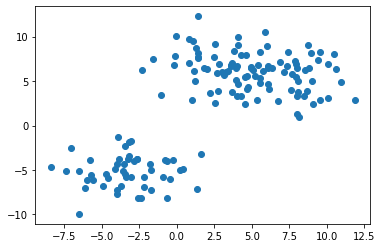

In [66]:
X, y = make_blobs(n_samples=150, centers=3, cluster_std=2)

plt.scatter(X[:,0], X[:,1])

# I- Clustering (KMeans)
**-> classer des données selon leur ressemblance**

**ex:** classer des documents, photos, segmenter la clientèle

- On place au hasard 3 centroids, on affecte les points au centroid le plus proche puis on calcule la moyenne de chaque cluster et on y déplace le centroid(itérativement)


- On cherche à minimiser la variance des clusters (distance entre les points d'un cluster et le centre)

## Elbow Method 
**-> trouver un nombre de clusters optimal (zone de coude dans la minimisation du cout)**

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Cout du Modele (Inertia)')

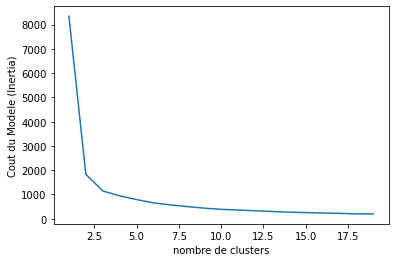

In [68]:
inertia = []

for k in range(1,20):
    km = KMeans(n_clusters=k).fit(X)
    inertia.append(km.inertia_)
    
plt.plot(range(1,20), inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du Modele (Inertia)')

[2 0 0 1 0 1 2 2 0 1 2 1 1 2 1 1 1 1 0 1 2 2 0 0 0 0 1 1 0 2 2 2 0 1 0 2 1
 2 1 0 2 2 2 0 2 0 1 1 1 2 2 1 0 0 2 0 1 2 1 0 1 1 1 1 0 1 0 2 0 0 1 1 1 2
 0 1 1 2 0 0 0 1 0 2 1 1 0 0 1 1 1 2 0 0 2 2 2 1 2 0 0 1 0 2 2 2 0 0 2 1 1
 0 0 1 2 1 0 1 0 2 1 0 0 2 0 1 2 1 0 0 2 1 0 1 1 1 2 1 2 0 1 1 1 1 0 2 2 1
 0 1]
[[-3.2546055  -5.17568878]
 [ 2.90825371  6.57314382]
 [ 8.06514483  5.32438395]]
1147.6402044846163
-1147.6402044846163


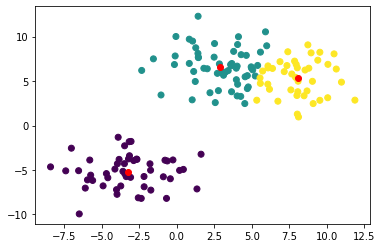

In [72]:
model = KMeans(n_clusters=3)
model.fit(X)

print(model.labels_) # = model.predict(X)
print(model.cluster_centers_)  # les centroids
print(model.inertia_) # somme des distances entre les points d'un cluster et le centroid
print(model.score(X)) # opposé de inertia

plt.scatter(X[:,0], X[:,1], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')

# II- Anomaly Detection (Isolation Forest)
**ex:** détection de fraudes bancaires, de hacking, de défaillances techniques
**-> détecter les échantillons dont les caractéristiques sont très éloignées de celles des autres.**

- Effectuer une série de splits aléatoires, en comptant le nombre de splits nécessaires pour isoler les échantillons différents. Plus le nombre de splits est petit, plus il y a de chance d'anomalies. C'est une Technique d'ensemble -> on entraine plusieurs estimateurs pour ensuite considérer l'ensemble de leurs estimations


- autre méthode: Calculer la moyenne et l'écart type des données pour trouver une fonction densité de proba pour calculer la probabilité d'existence d'un échantillon donné

In [76]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

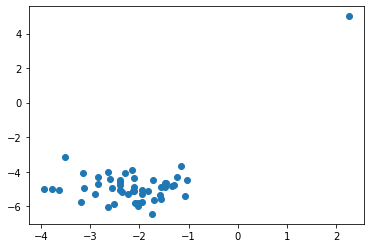

In [78]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.6)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:,1])

In [1]:
model = IsolationForest(contamination=0.01)
model.fit(X)

NameError: name 'IsolationForest' is not defined

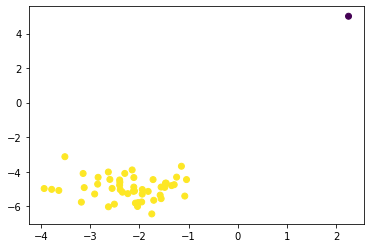

In [80]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))

## Decontamination Digits

In [84]:
from sklearn.datasets import load_digits

In [85]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

print(X.shape)

(1797, 64)


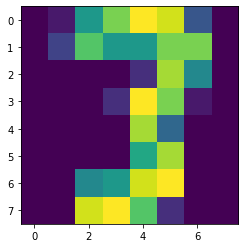

In [86]:
plt.imshow(images[23])

In [88]:
model = IsolationForest(random_state=0 , contamination=0.02)
model.fit(X)

outliers = model.predict(X) == -1

array([False, False, False, ..., False, False, False])

Text(0.5, 1.0, '7')

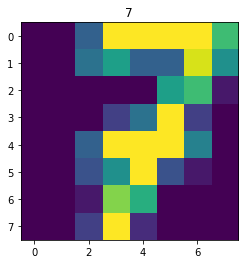

In [96]:
plt.imshow(images[outliers][3])
plt.title(y[outliers][3])

# III- Reduction de Dimension (PCA)
**-> réduire la complexité d'un dataset en projettant les données dans un espace de plus petite dimension (moins de variables)**

- ACP (Analyse en Composante Principale) -> projeter les données sur des axes (Composantes Principales) en cherchant à miniser la distance entre les points et leurs projection. Réduit la dimension tout en préservant au max la variance 

- calculer matrice de covariance des variables

- calculer les vecteurs propres de la matrice (Composantes Principales)

/!\ StandardScaler -> PCA pour des datasets linéaires

In [97]:
from sklearn.decomposition import PCA

In [104]:
# Visualiser les données dans un espace 2D ou 3D (n_components=2 ou 3) methode1 
model = PCA(n_components=2)
X_reduced = model.fit_transform(X)

plt.scatter(X_reduced[:,0],X_reduced[:,1], c=y)
plt.colorbar()

-136.8331797446114


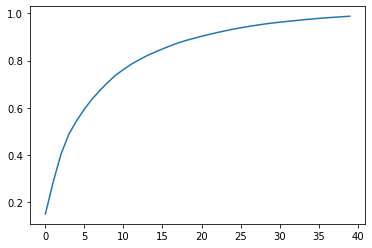

In [121]:
# Choisir n_components de telle sorte à conserver entre 95 et 99% de la variance des données methode2
# on commence avec le nombre total de variables, ou peut directement indiquer le % voulu et après 
# observer model.n_components_
model = PCA(n_components=40)  
X_reduced = model.fit_transform(X)

# faire une somme cumulée des % de var préservé par chaque composante
plt.plot(np.cumsum(model.explained_variance_ratio_))

np.argmax(np.cumsum(model.explained_variance_ratio_) > 0.99) # ou 0.95 et on remplace n_components

Text(0.5, 1.0, '0')

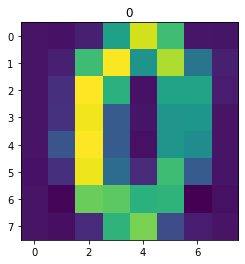

In [119]:
X_recovered = model.inverse_transform(X_reduced)
plt.imshow(X_recovered[10].reshape((8,8)))
plt.title(y[10])

# Ensemble Learning

**-> technique consistant à entrainer plusieurs estimateurs pour considérer l'ensemble de leurs estimations (Random Forest, Isolation Forest) WISDOM OF THE CROWD(sagesse de la foule). Loi des grands nombre = plus il y a de modèles, plus la performance est meilleure**

- chaque modèle doit avoir au moins 50% de performance
- la foule doit être diversifiée


- **1. Bagging** -> créer plusieurs copies d'un même modèle, en entrainant chaque copie sur une partie aléatoire du dataset. Puis on les regroupe les résultats de chaque modèle pour faire la prédiction finale (**Random Forest**). Chaque modèle est overfitté mais la foule permet de réduire la variance. 


- **2. Boosting** -> on entraine successivement plusieurs modèles (faibles) de sorte que chaque modèle puisse corriger les erreurs de son prédécesseur. Chaque modèle est underfitté mais la foule permet de réduire le biais. 


- **3. Stacking** -> on rassemble les prédictions de chaque modèle puis on demande à un dernier modèle de prédire le résultat final en fonction des prédictions des autres

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

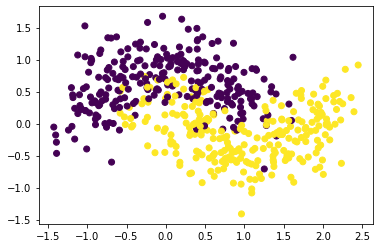

In [125]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Voting Classifier 

In [140]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [141]:
model1 = SGDClassifier(random_state=0)
model2 = DecisionTreeClassifier(random_state=0)
model3 = KNeighborsClassifier(n_neighbors=2)

model4 = VotingClassifier([('SGD', model1),
                           ('Tree', model2),
                           ('KNN', model3)],
                          voting='hard')


for model in (model1, model2, model3, model4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

SGDClassifier 0.8466666666666667
DecisionTreeClassifier 0.8533333333333334
KNeighborsClassifier 0.8533333333333334
VotingClassifier 0.8866666666666667


## 1. Bagging 

In [144]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier 

In [146]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                         n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9

In [147]:
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8933333333333333

## 2. Boosting

In [148]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier 

In [150]:
model = GradientBoostingClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9066666666666666

## 3. Stacking

In [152]:
from sklearn.ensemble import StackingClassifier 

In [155]:
model1 = SGDClassifier(random_state=0)
model2 = DecisionTreeClassifier(random_state=0)
model3 = KNeighborsClassifier(n_neighbors=2)

model = StackingClassifier([('SGD', model1),
                           ('Tree', model2),
                           ('KNN', model3)],
                          final_estimator=KNeighborsClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.84